In [1]:
# !pip install --user uproot
# !pip install --user vector 
# !pip install --user --upgrade awkward

import sys
sys.path.append("/eos/home-m/qintong/.local/lib/python2.7/site-packages")

In [2]:
# !pip list

In [3]:
import uproot3 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

import vector
import awkward as ak  # at least version 1.2.0


2022-09-08 17:32:57.055631: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-08 17:32:57.064910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-08 17:32:57.064926: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# loading the tree
# tree = uproot3.open("/eos/user/q/qintong/SWAN_projects/Masters2021/MVAFILE_GluGluHToTauTauUncorrelatedDecay_Filtered_tt_2018.root")["ntuple"]
# tree2 = uproot3.open("/eos/user/q/qintong/SWAN_projects/Masters2021/MVAFILE_VBFHToTauTauUncorrelatedDecay_Filtered_tt_2018.root")["ntuple"]

#tree = uproot3.open("/eos/user/q/qintong/SWAN_projects/Masters2021/Reco_data/DY1JetsToLL-LO_2018_tt_0.root")["ntuple"]
#tree2 = uproot3.open("/home/ql1821/Desktop/Research_Project/data/SV_GluGluHToTauTau_M-125_tt_2018.root")["ntuple"]
tree2 = uproot3.open("/home/ql1821/Desktop/Research_Project/data/SV_GluGluHToTauTauUncorrelatedDecay_Filtered_tt_2018.root")["ntuple"]

In [5]:
# define what variables are to be read into the dataframe

variables = [ 
            'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1',
            'pi2_px_1', 'pi2_py_1', 'pi2_pz_1', 'pi2_E_1',
            'pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1', 
            'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2', 
            'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2', 
            'pi3_px_2', 'pi3_py_2', 'pi3_pz_2', 'pi3_E_2', 
            'pi0_px_1', 'pi0_py_1', 'pi0_pz_1', 'pi0_E_1', 
            'pi0_px_2', 'pi0_py_2', 'pi0_pz_2', 'pi0_E_2', 
            'tau_decay_mode_1','tau_decay_mode_2',
            'gen_nu_p_1','gen_nu_px_1','gen_nu_py_1','gen_nu_pz_1','gen_nu_E_1',
            'gen_nu_p_2','gen_nu_px_2','gen_nu_py_2','gen_nu_pz_2','gen_nu_E_2',
            'gen_vis_p_1','gen_vis_px_1','gen_vis_py_1','gen_vis_pz_1','gen_vis_E_1',
            'gen_vis_p_2','gen_vis_px_2','gen_vis_py_2','gen_vis_pz_2','gen_vis_E_2',
            'met','m_sv',
            'aco_angle_1','aco_angle_2',
            'lead_pt_1','pt_vis','pt_1','pt_2',
            'eta_1','eta_2',
            'metx','mety',
            'ip_x_1','ip_y_1','ip_z_1',
            'ip_x_2','ip_y_2','ip_z_2',
            'sv_x_1','sv_y_1','sv_z_1',
            'sv_x_2','sv_y_2','sv_z_2',
            'Px_h','Py_h','Pz_h',
            'pt_h','eta_h'
            #'wt_cp_sm', 'wt_cp_ps', 'wt_cp_mm','rand',
             ]

#df1 = tree.pandas.df(variables)

df2 = tree2.pandas.df(variables)

#combine VBF and ggH events

#df = pd.concat([df1,df2], ignore_index=True)
#print('{0}\n{1}\n{2}\n{3}'.format(A,B,C,D))
#df1['dm_1'],df1['dm_2'] = df1["tau_decay_mode_1"],df1["tau_decay_mode_2"]
df2['dm_1'],df2['dm_2'] = df2["tau_decay_mode_1"],df2["tau_decay_mode_2"]

(array([ 1169.,  1096.,  1179.,  1211.,  1273.,  1023.,  1569.,  1279.,
         1322.,  1518.,  1181.,  1712.,  1572.,  1352.,  1720.,  1500.,
         1403.,  1908.,  1789.,  1792.,  1622.,  1815.,  1915.,  1963.,
         1843.,  2259.,  2033.,  2275.,  2120.,  2325.,  2316.,  2404.,
         2349.,  2378.,  2610.,  2869.,  2940.,  2804.,  2965.,  3262.,
         3120.,  3421.,  3707.,  3707.,  3881.,  4076.,  4224.,  4242.,
         5059.,  5124.,  5263.,  6072.,  6252.,  6839.,  7148.,  7734.,
         8370.,  9177., 10270., 10850., 12143., 13434., 14561., 16414.,
        17862., 19887., 21988., 24864., 27938., 32169., 36717., 42907.,
        51864., 63462., 72346., 72927., 64572., 52251., 43711., 37434.,
        32957., 28600., 25326., 22339., 20050., 18116., 16830., 14889.,
        13588., 12473., 11031., 10470.,  9355.,  8625.,  7963.,  7197.,
         6884.,  6222.,  6145.,  5176.,  5087.,  5068.,  4190.,  4227.,
         4064.,  3808.,  3643.,  3541.,  3230.,  3107.,  3158., 

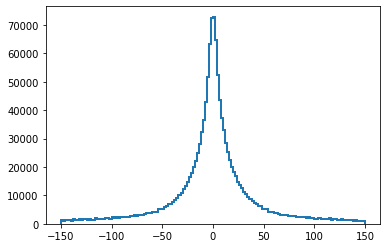

In [6]:
plt.hist(df2['Px_h'],histtype=u'step', lw=2,bins = 150,range = (-150,150),label = 'true')

### Preselection of data

* Select all hadronic decays, i.e. when dm = 0, 1, 10 in this sample. This means that at least one set of pion momentum is not 0.
* In this case, dm = 11 is also included. However, this channel is not considered in the analysis.

Therefore, the preselection will ignore all the events when all $\pi$ momentum components are zeros as well as when the dm == 11.

In [7]:
df_products = df2.iloc[:,0:32]
df_select = df2.loc[(df_products != 0).any(axis=1)]
df_select = df_select[(df_select['dm_1']<11)&(df_select['dm_2']<11)]
l = df_select.index.to_numpy()

a = []
b = []
c = []

for i in l:
    a.append(df2['dm_1'][i]) 
    b.append(df2['dm_2'][i])

# df_select['tau_1'],df_select['tau_2']= [a,b]
# df_select['tau_2'] = b
# df_select['mass'] = c

In [8]:
#df_select = df_select[(df_select['pt_1']>40)&(abs(df_select['eta_1'])<2.1)&(df_select['pt_2']>40)&(abs(df_select['eta_2'])<2.1)]

In [9]:
df_c1 = df_select[(df_select['dm_1'] == 0) & (df_select['dm_2'] == 0)]
df_c2 = df_select[(df_select['dm_1'] == 1) & (df_select['dm_2'] == 0)]
df_c3 = df_select[(df_select['dm_1'] == 1) & (df_select['dm_2'] == 1)]
df_c4 = df_select[(df_select['dm_1'] == 1) & (df_select['dm_2'] == 10)]
df_c5 = df_select[(df_select['dm_1'] == 10) & (df_select['dm_2'] == 0)]
df_c6 = df_select[(df_select['dm_1'] == 10) & (df_select['dm_2'] == 10)]
df_c7 = df_select[(df_select['dm_1'] == 0) & (df_select['dm_2'] == 1)]
df_c8 = df_select[(df_select['dm_1'] == 0) & (df_select['dm_2'] == 10)]
df_c9 = df_select[(df_select['dm_1'] == 10) & (df_select['dm_2'] == 1)]

In [10]:
len(df_c1)+len(df_c2)+len(df_c3)+len(df_c4)+len(df_c5)+len(df_c6)+len(df_c7)+len(df_c8)+len(df_c9)

1164401

In [11]:
def combine_taus(n1,n2):
    ind = []
    for i in l:
        if (df_select['dm_1'][i] == n1) & (df_select['dm_2'][i] == n2):
                ind.append(i)
                df_c = df_select.iloc[ind]
    return df_c

In [12]:
def convert_vectors(df_taus,X,Y,Z,Energy,):
    A = df_taus[[X]].to_numpy()
    B = df_taus[[Y]].to_numpy()
    C = df_taus[[Z]].to_numpy()
    D = df_taus[[Energy]].to_numpy()
    A = [x for l in A for x in l]
    B = [x for l in B for x in l]
    C = [x for l in C for x in l]
    D = [x for l in D for x in l]

    v = []
    for i in range(len(A)):
        a = vector.obj(x=A[i], y=B[i], z=C[i], E=D[i])
        
        v.append(a)
    return v

In [13]:
def convert_vectors_gen(X,Y,Z,Energy,):
    A = df_select[[X]].to_numpy()
    B = df_select[[Y]].to_numpy()
    C = df_select[[Z]].to_numpy()
    D = df_select[[Energy]].to_numpy()
    A = [x for l in A for x in l]
    B = [x for l in B for x in l]
    C = [x for l in C for x in l]
    D = [x for l in D for x in l]

    v = []
    for i in range(len(A)):
        a = vector.obj(x=A[i], y=B[i], z=C[i], E=D[i])
        
        v.append(a)
    return v

In [14]:
#(0,0)
pi_v_c1 = convert_vectors(df_c1,'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1')
#nu_v_c1 = convert_vectors(df_c1,'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1')

pi_v2_c1 = convert_vectors(df_c1,'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2')
#nu_v2_c1 = convert_vectors(df_c1,'nu_px_2', 'nu_py_2', 'nu_pz_2', 'nu_E_2')

#(1,0)
pi_v_c2 = convert_vectors(df_c2,'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1')
pi0_v_c2 = convert_vectors(df_c2,'pi0_px_1', 'pi0_py_1', 'pi0_pz_1', 'pi0_E_1')
#nu_v_c2 = convert_vectors(df_c2,'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1')

pi_v2_c2 = convert_vectors(df_c2,'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2')
#nu_v2_c2 = convert_vectors(df_c2,'nu_px_2', 'nu_py_2', 'nu_pz_2', 'nu_E_2')

#(1,1)
pi_v_c3 = convert_vectors(df_c3,'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1')
pi0_v_c3 = convert_vectors(df_c3,'pi0_px_1', 'pi0_py_1', 'pi0_pz_1', 'pi0_E_1')
#nu_v_c3 = convert_vectors(df_c3,'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1')

pi_v2_c3 = convert_vectors(df_c3,'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2')
pi0_v2_c3 = convert_vectors(df_c3,'pi0_px_2', 'pi0_py_2', 'pi0_pz_2', 'pi0_E_2')
#nu_v2_c3 = convert_vectors(df_c3,'nu_px_2', 'nu_py_2', 'nu_pz_2', 'nu_E_2')

#(1,10)
pi_v_c4 = convert_vectors(df_c4,'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1')
pi0_v_c4 = convert_vectors(df_c4,'pi0_px_1', 'pi0_py_1', 'pi0_pz_1', 'pi0_E_1')
#nu_v_c4 = convert_vectors(df_c4,'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1')

pi_v2_c4 = convert_vectors(df_c4,'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2')
pi2_v2_c4 = convert_vectors(df_c4,'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2')
pi3_v2_c4 = convert_vectors(df_c4,'pi3_px_2', 'pi3_py_2', 'pi3_pz_2', 'pi3_E_2')
#nu_v2_c4 = convert_vectors(df_c4,'nu_px_2', 'nu_py_2', 'nu_pz_2', 'nu_E_2')

#(10,0)
pi_v_c5 = convert_vectors(df_c5,'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1')
pi2_v_c5 = convert_vectors(df_c5,'pi2_px_1', 'pi2_py_1', 'pi2_pz_1', 'pi2_E_1')
pi3_v_c5 = convert_vectors(df_c5,'pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1')
#nu_v_c5 = convert_vectors(df_c5,'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1')


pi_v2_c5 = convert_vectors(df_c5,'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2')
#nu_v2_c5 = convert_vectors(df_c5,'nu_px_2', 'nu_py_2', 'nu_pz_2', 'nu_E_2')

#(10,10)
pi_v_c6 = convert_vectors(df_c6,'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1')
pi2_v_c6 = convert_vectors(df_c6,'pi2_px_1', 'pi2_py_1', 'pi2_pz_1', 'pi2_E_1')
pi3_v_c6 = convert_vectors(df_c6,'pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1')
#nu_v_c6 = convert_vectors(df_c6,'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1')

pi_v2_c6 = convert_vectors(df_c6,'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2')
pi2_v2_c6 = convert_vectors(df_c6,'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2')
pi3_v2_c6 = convert_vectors(df_c6,'pi3_px_2', 'pi3_py_2', 'pi3_pz_2', 'pi3_E_2')
#nu_v2_c6 = convert_vectors(df_c6,'nu_px_2', 'nu_py_2', 'nu_pz_2', 'nu_E_2')

#(0,1)
pi_v_c7 = convert_vectors(df_c7,'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1')

pi_v2_c7 = convert_vectors(df_c7,'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2')
pi0_v2_c7 = convert_vectors(df_c7,'pi0_px_2', 'pi0_py_2', 'pi0_pz_2', 'pi0_E_2')

#(0,10)
pi_v_c8 = convert_vectors(df_c8,'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1')

pi_v2_c8 = convert_vectors(df_c8,'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2')
pi2_v2_c8 = convert_vectors(df_c8,'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2')
pi3_v2_c8 = convert_vectors(df_c8,'pi3_px_2', 'pi3_py_2', 'pi3_pz_2', 'pi3_E_2')

#(10,1)
pi_v_c9 = convert_vectors(df_c9,'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1')
pi2_v_c9 = convert_vectors(df_c9,'pi2_px_1', 'pi2_py_1', 'pi2_pz_1', 'pi2_E_1')
pi3_v_c9 = convert_vectors(df_c9,'pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1')

pi_v2_c9 = convert_vectors(df_c9,'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2')
pi0_v2_c9 = convert_vectors(df_c9,'pi0_px_2', 'pi0_py_2', 'pi0_pz_2', 'pi0_E_2')

#generated nutrinos
nu_1 = convert_vectors_gen('gen_nu_px_1','gen_nu_py_1', 'gen_nu_pz_1', 'gen_nu_E_1')
nu_2 = convert_vectors_gen('gen_nu_px_2','gen_nu_py_2', 'gen_nu_pz_2', 'gen_nu_E_2')

#generated visibles
vis_1 = convert_vectors_gen('gen_vis_px_1', 'gen_vis_py_1', 'gen_vis_pz_1', 'gen_vis_E_1')
vis_2 = convert_vectors_gen('gen_vis_px_2', 'gen_vis_py_2', 'gen_vis_pz_2', 'gen_vis_E_2')

In [15]:
def Tau_4m(*arg):
    out = []
    for i in range(len(arg[0])):
        
        total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
        for v in arg:
            total = total + v[i]
        out.append(total)
    return out

In [16]:
def getM(*arg):
    Energy = Tau_4m(*arg)
    x = range(0,2084)

    Tau1_p = []
    for i in range(len(Energy)):
        p_1 = (Energy[i].px, Energy[i].py, Energy[i].pz)
        Tau1_p.append(p_1)
    Tau1_p

    P = []
    for i in range(len(Tau1_p)):
        P.append(np.linalg.norm(Tau1_p[i]))

    return P

In [17]:

def compute_mass(*arg):
    out = np.empty(len(arg[1]), np.float64)
    for i in range(len(arg[1])):
        
        total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
        for v in arg:
            total = total + v[i]
        out[i] = total.mass
    return out

In [18]:
def getM_compo(*arg):
    p = []
    for i in range(len(df_select[arg[0]])):
        p1 = 0
        for v in arg:
            p1 = p1+df_select[v].to_numpy()[i]
        p.append(p1)
        i=+1
    return p

In [19]:
def getM_compo_reco(df_tau,*arg):
    p = []
    for i in range(len(df_tau[arg[1]])):
        p1 = 0
        for v in arg:
            p1 = p1+df_tau[v].to_numpy()[i]
        p.append(p1)
        i=+1
    return p

In [20]:
n_gen = getM(nu_1,vis_1,nu_2,vis_2)
n_gen_x = getM_compo('gen_nu_px_1','gen_nu_px_2','gen_vis_px_1','gen_vis_px_2')
n_gen_y = getM_compo('gen_nu_py_1','gen_nu_py_2','gen_vis_py_1','gen_vis_py_2')
n_gen_z = getM_compo('gen_nu_pz_1','gen_nu_pz_2','gen_vis_pz_1','gen_vis_pz_2')

In [21]:
n1 = getM(pi_v_c1,pi_v2_c1)
n2 = getM(pi_v_c2,pi0_v_c2,pi_v2_c2)
n3 = getM(pi_v_c3,pi0_v_c3,pi_v2_c3,pi0_v2_c3)
n4 = getM(pi_v_c4,pi0_v_c4,pi_v2_c4,pi2_v2_c4,pi3_v2_c4)
n5 = getM(pi_v_c5,pi2_v_c5,pi3_v_c5,pi_v2_c5)
n6 = getM(pi_v_c6,pi2_v_c6,pi3_v_c6,pi_v2_c6,pi2_v2_c6,pi3_v2_c6)
n7 = getM(pi_v_c7,pi_v2_c7,pi0_v2_c7)
n8 = getM(pi_v_c8,pi_v2_c8,pi2_v2_c8,pi3_v2_c8)
n9 = getM(pi_v_c9,pi2_v_c9,pi3_v_c9,pi_v2_c9,pi0_v2_c9)

In [22]:
#(0,0)
n1_x = getM_compo_reco(df_c1,'pi_px_1','pi_px_2')
#(1,0)
n2_x = getM_compo_reco(df_c2,'pi_px_1','pi0_px_1','pi_px_2')
#(1,1)
n3_x = getM_compo_reco(df_c3,'pi_px_1','pi0_px_1','pi_px_2','pi0_px_2')
#(1,10)
n4_x = getM_compo_reco(df_c4,'pi_px_1','pi0_px_1','pi_px_2','pi2_px_2','pi3_px_2')
#(10,0)
n5_x = getM_compo_reco(df_c5,'pi_px_1','pi2_px_1','pi3_px_1','pi_px_2')
#(10,10)
n6_x = getM_compo_reco(df_c6,'pi_px_1','pi2_px_1','pi3_px_1','pi_px_2','pi2_px_2','pi3_px_2')
#(0,1)
n7_x = getM_compo_reco(df_c7,'pi_px_1','pi_px_2','pi0_px_2')
#(0,10)
n8_x = getM_compo_reco(df_c8,'pi_px_1','pi_px_2','pi2_px_2','pi3_px_2')
#(10,1)
n9_x = getM_compo_reco(df_c9,'pi_px_1','pi2_px_1','pi3_px_1','pi_px_2','pi0_px_2')

In [23]:
n1_y = getM_compo_reco(df_c1,'pi_py_1','pi_py_2')
n2_y = getM_compo_reco(df_c2,'pi_py_1','pi0_py_1','pi_py_2')
n3_y = getM_compo_reco(df_c3,'pi_py_1','pi0_py_1','pi_py_2','pi0_py_2')
n4_y = getM_compo_reco(df_c4,'pi_py_1','pi0_py_1','pi_py_2','pi2_py_2','pi3_py_2')
n5_y = getM_compo_reco(df_c5,'pi_py_1','pi2_py_1','pi3_py_1','pi_py_2')
n6_y = getM_compo_reco(df_c6,'pi_py_1','pi2_py_1','pi3_py_1','pi_py_2','pi2_py_2','pi3_py_2')
n7_y = getM_compo_reco(df_c7,'pi_py_1','pi_py_2','pi0_py_2')
n8_y = getM_compo_reco(df_c8,'pi_py_1','pi_py_2','pi2_py_2','pi3_py_2')
n9_y = getM_compo_reco(df_c9,'pi_py_1','pi2_py_1','pi3_py_1','pi_py_2','pi0_py_2')

In [24]:
n1_z = getM_compo_reco(df_c1,'pi_pz_1','pi_pz_2')
n2_z = getM_compo_reco(df_c2,'pi_pz_1','pi0_pz_1','pi_pz_2')
n3_z = getM_compo_reco(df_c3,'pi_pz_1','pi0_pz_1','pi_pz_2','pi0_pz_2')
n4_z = getM_compo_reco(df_c4,'pi_pz_1','pi0_pz_1','pi_pz_2','pi2_pz_2','pi3_pz_2')
n5_z = getM_compo_reco(df_c5,'pi_pz_1','pi2_pz_1','pi3_pz_1','pi_pz_2')
n6_z = getM_compo_reco(df_c6,'pi_pz_1','pi2_pz_1','pi3_pz_1','pi_pz_2','pi2_pz_2','pi3_pz_2')
n7_z = getM_compo_reco(df_c7,'pi_pz_1','pi_pz_2','pi0_pz_2')
n8_z = getM_compo_reco(df_c8,'pi_pz_1','pi_pz_2','pi2_pz_2','pi3_pz_2')
n9_z = getM_compo_reco(df_c9,'pi_pz_1','pi2_pz_1','pi3_pz_1','pi_pz_2','pi0_pz_2')

In [25]:
n_reco = n1+n2+n3+n4+n5+n6+n7+n8+n9
n_reco_x = n1_x+n2_x+n3_x+n4_x+n5_x+n6_x+n7_x+n8_x+n9_x
n_reco_y = n1_y+n2_y+n3_y+n4_y+n5_y+n6_y+n7_y+n8_y+n9_y
n_reco_z = n1_z+n2_z+n3_z+n4_z+n5_z+n6_z+n7_z+n8_z+n9_z


print(len(n_reco),len(n_gen))

1164401 1164401


In [26]:
np.sqrt(n_reco_x[1]**2+n_reco_y[1]**2+n_reco_z[1]**2)
#n_reco[1]

249.58196956256376

In [27]:
# n1_reco = Tau_4m(pi_v_c1)
# n2_reco = Tau_4m(pi_v_c2,pi0_v_c2)
# n3_reco = Tau_4m(pi_v_c3,pi0_v_c3)
# n4_reco = Tau_4m(pi_v_c4,pi0_v_c4)
# n5_reco = Tau_4m(pi_v_c5,pi2_v_c5,pi3_v_c5)
# n6_reco = Tau_4m(pi_v_c6,pi2_v_c6,pi3_v_c6)
# n7_reco = Tau_4m(pi_v_c7)
# n8_reco = Tau_4m(pi_v_c8)
# n9_reco = Tau_4m(pi_v_c9,pi2_v_c9,pi3_v_c9)

#n_reco_vis = n1+n2+n3+n4+n5+n6+n7+n8+n9

#n_gen_reco_vis = getM(nu_1,n_reco_vis)

In [28]:
# plt.hist(n_gen_reco_vis,bins = 100,range=(0,520))
# plt.xlabel('ratio of momentums')
# #plt.title('Distribution of real and predicted $\\frac{P_{vis}}{P_{gen}}$')
# plt.title('momentum calculated by summing of the reco-visible and gen-neutrino 4-vectors')

In [29]:
#plt.hist(df_select['Py_h'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'svfit px')

# Regression

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import Input, Model
#from keras.layers.normalization import BatchNormalization

In [31]:
met = df_select['met']
svmass = df_select['m_sv']
le = df_select['lead_pt_1']
pt = df_select['pt_vis']


In [32]:
n_met,bins,patch = plt.hist(met,bins = 1000,density = True)
n_msv,bins,patch = plt.hist(svmass,bins = 1000,density = True)
n_l,bins,patch = plt.hist(le,bins = 1000,density = True)
n_pt,bins,patch = plt.hist(pt,bins = 1000,density = True)
plt.close()

In [33]:
d = {
    'met': met,
    'pi_px_1':df_select['pi_px_1'],
    'pi_py_1':df_select['pi_py_1'],
    'pi_pz_1':df_select['pi_pz_1'],
    'pi_E_1':df_select['pi_E_1'],
    'pi2_px_1':df_select['pi2_px_1'],
    'pi2_py_1':df_select['pi2_py_1'],
    'pi2_pz_1':df_select['pi2_pz_1'],
    'pi2_E_1':df_select['pi2_E_1'],    
    'pi3_px_1':df_select['pi3_px_1'],
    'pi3_py_1':df_select['pi3_py_1'],
    'pi3_pz_1':df_select['pi3_pz_1'],
    'pi3_E_1':df_select['pi3_E_1'],
    'pi0_px_1':df_select['pi0_px_1'],
    'pi0_py_1':df_select['pi0_py_1'],
    'pi0_pz_1':df_select['pi0_pz_1'],
    'pi0_E_1':df_select['pi0_E_1'],
    

    'metx':df_select['metx'],
    'mety':df_select['mety'],
    
    'ip_x_1':df_select['ip_x_1'],
    'ip_y_1':df_select['ip_y_1'],
    'ip_z_1':df_select['ip_z_1'],
    'ip_x_2':df_select['ip_x_2'],
    'ip_y_2':df_select['ip_y_2'],
    'ip_z_2':df_select['ip_z_2'],
    
    'sv_x_1':df_select['sv_x_1'],
    'sv_y_1':df_select['sv_y_1'],
    'sv_z_1':df_select['sv_z_1'],
    'sv_x_2':df_select['sv_x_2'],
    'sv_y_2':df_select['sv_y_2'],
    'sv_z_2':df_select['sv_z_2'],
    

    'pi_px_2':df_select['pi_px_2'],
    'pi_py_2':df_select['pi_py_2'],
    'pi_pz_2':df_select['pi_pz_2'],
    'pi_E_2':df_select['pi_E_2'],
    'pi2_px_2':df_select['pi2_px_2'],
    'pi2_py_2':df_select['pi2_py_2'],
    'pi2_pz_2':df_select['pi2_pz_2'],
    'pi2_E_2':df_select['pi2_E_2'],    
    'pi3_px_2':df_select['pi3_px_2'],
    'pi3_py_2':df_select['pi3_py_2'],
    'pi3_pz_2':df_select['pi3_pz_2'],
    'pi3_E_2':df_select['pi3_E_2'],
    'pi0_px_2':df_select['pi0_px_2'],
    'pi0_py_2':df_select['pi0_py_2'],
    'pi0_pz_2':df_select['pi0_pz_2'],
    'pi0_E_2':df_select['pi0_E_2'],
#     'sv_mass': n_msv,
#     'lead_pt':le,
    'gen_p':n_gen,
    'gen_px':n_gen_x,
    'gen_py':n_gen_y,
    'gen_pz':n_gen_z,

#    'pt':pt,
    'reco_p':n_reco,
    'reco_px':n_reco_x,
    'reco_py':n_reco_y,
    'reco_pz':n_reco_z,
    'px':df_select['Px_h'],
    'py':df_select['Py_h'],
    'pz':df_select['Pz_h'],
#    'gen_vis_p_1':df_select['gen_vis_p_1'],
#    'reco_vis_p_1':n_gen_reco_vis
    }

df = pd.DataFrame(data=d).dropna()

In [34]:
# df.to_pickle("./df_Higgs_regression.pkl")

In [35]:
#df = pd.read_pickle("./df_Higgs_regression.pkl")  

In [36]:
y= df.filter(['gen_p','gen_px','gen_py','gen_pz'])#.to_frame()
X=df.drop(['gen_p','gen_px','gen_py','gen_pz'],axis=1)

# x_train, x_test, y_train, y_test=train_test_split(x_data,y_val,test_size=0.3,random_state=101)
X_train_o,X_test_o, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)

X_train = X_train_o.drop(['px','py','pz'],axis=1)
X_test = X_test_o.drop(['px','py','pz'],axis=1)

In [37]:
np.array(y_train['gen_p'])

array([1.76656217e+02, 2.06014261e+01, 3.46933355e+02, ...,
       6.59201504e+01, 3.46490792e+04, 1.33297581e+02])

In [38]:
print(len(X_test.columns))
print((len(X_test.columns)+4)/2)
def baseline_model():

    model = Sequential()
    
    model.add(Dense(len(X_test.columns), input_dim=len(X_test.columns), kernel_initializer='normal', activation='relu'))

    model.add(Dense((len(X_test.columns))*8, kernel_initializer='normal', activation='relu'))

    model.add(Dense((len(X_test.columns))*6, kernel_initializer='normal', activation='relu'))

    #model.add(Dense((len(X.columns))*5, kernel_initializer='normal', activation='relu'))

    #model.add(Dense((len(X.columns))*8, kernel_initializer='normal', activation='relu'))
    #model.add(BatchNormalization())

    model.add(Dense(4, activation='linear'))
    #model.compile(loss='mean_squared_logarithmic_error', optimizer='adam') #Nadam
    #loss_f = 
    model.compile(loss=['mae','mae','mae','mae'],optimizer='adam')
    return model

51
27.5


In [39]:
model = baseline_model()

history = model.fit( X_train, 
          [y_train],
                #sample_weight=w_train,
                batch_size=1000,
                epochs=20,
                #callbacks=[history],
                #callbacks=[early_stop],
                validation_data=(X_test, 
          [y_test],)
         )#, w_val))

2022-09-08 17:39:25.315049: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-08 17:39:25.315105: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-08 17:39:25.315162: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ql1821-laptop): /proc/driver/nvidia/version does not exist
2022-09-08 17:39:25.319859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
931/931 [==============================] - 9s 9ms/step - loss: 471.7567 - val_loss: 473.1090
Epoch 2/20
931/931 [==============================] - 8s 9ms/step - loss: 468.0284 - val_loss: 472.1830
Epoch 3/20
931/931 [==============================] - 9s 9ms/step - loss: 467.0773 - val_loss: 471.3799
Epoch 4/20
931/931 [==============================] - 8s 9ms/step - loss: 466.2648 - val_loss: 470.9935
Epoch 5/20
931/931 [==============================] - 9s 10ms/step - loss: 465.6399 - val_loss: 470.2119
Epoch 6/20
931/931 [==============================] - 9s 9ms/step - loss: 465.1115 - val_loss: 469.5282
Epoch 7/20
931/931 [==============================] - 10s 10ms/step - loss: 464.8595 - val_loss: 469.2336
Epoch 8/20
931/931 [==============================] - 9s 9ms/step - loss: 464.6312 - val_loss: 469.1487
Epoch 9/20
931/931 [==============================] - 8s 9ms/step - loss: 464.4616 - val_loss: 469.3007
Epoch 10/20
931/931 [==============================] - 9s 10m

In [40]:
# inputs = Input(shape=(51,))
# # x = Dense(16, activation='relu')(inputs)
# # x = Dense(32, activation='relu')(x)

# x = Dense(len(X.columns), kernel_initializer='normal', activation='relu')(inputs)
# x = Dense((len(X.columns))*4, kernel_initializer='normal', activation='relu')(x)
# # x = Dense((len(X.columns))*4, kernel_initializer='normal', activation='relu')(x)
# # x = Dense((len(X.columns))*5, kernel_initializer='normal', activation='relu')(x)
# # x = Dense((len(X.columns))*8, kernel_initializer='normal', activation='relu')(x)

# output1 = Dense(4, activation='relu',name = 't')(x)
# output2 = Dense(4, activation='relu',name = 'x')(x)
# output3 = Dense(4, activation='relu',name = 'y')(x)
# output4 = Dense(4, activation='relu',name = 'z')(x)

# #loss_f = tf.keras.losses.cosine_similarity(y_true, y_pred, axis=1)

# model = Model(inputs=inputs, outputs=[output1,output2,output3,output4])
# model.compile(loss=['mae','mae',
#                     'mae', 'mae'], optimizer='adam') #Nadam

In [41]:
# from keras.callbacks import History 
# #history = History()

# #model = baseline_model()

# history = model.fit( X_train, 
#           {'t':np.array(y_train['gen_p']),
#            'x':np.array(y_train['gen_px']),
#            'y':np.array(y_train['gen_py']),
#            'z':np.array(y_train['gen_pz'])},
#                 #sample_weight=w_train,
#                 batch_size=1000,
#                 epochs=20,
#                 #callbacks=[history],
#                 #callbacks=[early_stop],
#                 validation_data=(X_test, 
#           {'t':np.array(y_test['gen_p']),
#            'x':np.array(y_test['gen_px']),
#            'y':np.array(y_test['gen_py']),
#            'z':np.array(y_test['gen_pz'])},)
#          )#, w_val))

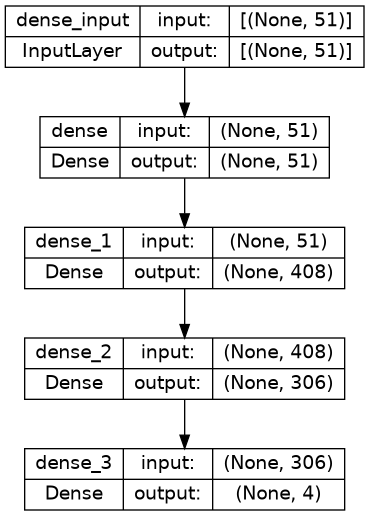

In [42]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

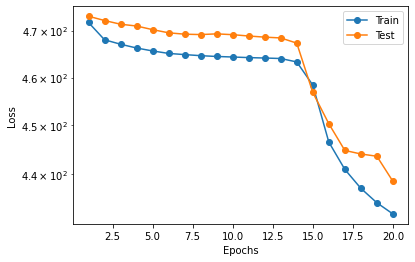

In [43]:
# Extract number of run epochs from the training history
epochs = range(1, len(history.history["loss"])+1)

# Extract loss on training and validation ddataset and plot them together
plt.plot(epochs, history.history["loss"], "o-", label="Train")
plt.plot(epochs, history.history["val_loss"], "o-", label="Test")
#plt.plot(epochs, model.history["mean_squared_error"], "o-", label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale("log")
plt.legend();


In [44]:
prediction = model.predict(X_test)

7273/7273 [==============================] - 4s 528us/step


In [45]:
prediction

array([[  51.260162 ,    1.248451 ,   14.547543 ,  -47.244587 ],
       [  22.930534 ,   -3.313008 ,   11.929398 ,   -7.913685 ],
       [ 414.52374  , -126.78938  ,  -26.823826 ,  386.98785  ],
       ...,
       [  75.702965 ,  -49.0271   ,   31.770992 ,   44.3842   ],
       [ 175.55887  , -114.309364 ,  110.77925  ,   61.486664 ],
       [ 208.89156  ,   -2.3843074,   11.067481 , -205.70045  ]],
      dtype=float32)

In [46]:
#plot distributions also
data_true=pd.DataFrame(y_test)
data_pred=pd.DataFrame(prediction)
data_true.reset_index()
data_pred.reset_index()
print(data_pred[:10])
print(data_true[:10])
#data_pred.rename(columns={"0": "data_true"})#, "1": "Phigentau_1", "2": "Etagentau_1", "3": "Mgentau_1"}, errors="raise")
data_pred.columns = data_true.columns
#print(data_pred[:10])

            0           1           2           3
0   51.260162    1.248451   14.547543  -47.244587
1   22.930534   -3.313008   11.929398   -7.913685
2  414.523743 -126.789383  -26.823826  386.987854
3  301.210999  -28.335623   63.096188 -242.375748
4   31.781696   20.282078    5.692255  -22.427820
5  385.890808   50.201141 -385.159180   47.388248
6  580.640076  245.403793   74.848274  499.827820
7  245.963715  -91.728058 -152.658432  169.124603
8   44.984818  -20.771694  -34.808285   -2.619212
9   74.217499    6.891417   10.059274  -72.249763
              gen_p      gen_px      gen_py      gen_pz
entry                                                  
789810    61.195773    1.335287   35.723076  -49.668919
117763    24.723110  -13.417062   18.888483   -8.627851
67895    414.303861 -127.512528  -59.279950  389.710318
1291485  232.772321   36.956200   41.834848 -225.980172
87382     39.016845   30.843801  -13.844398  -19.475801
91678    424.621052   57.062242 -420.486811   15.420105
73

In [47]:
type(data_true)

pandas.core.frame.DataFrame

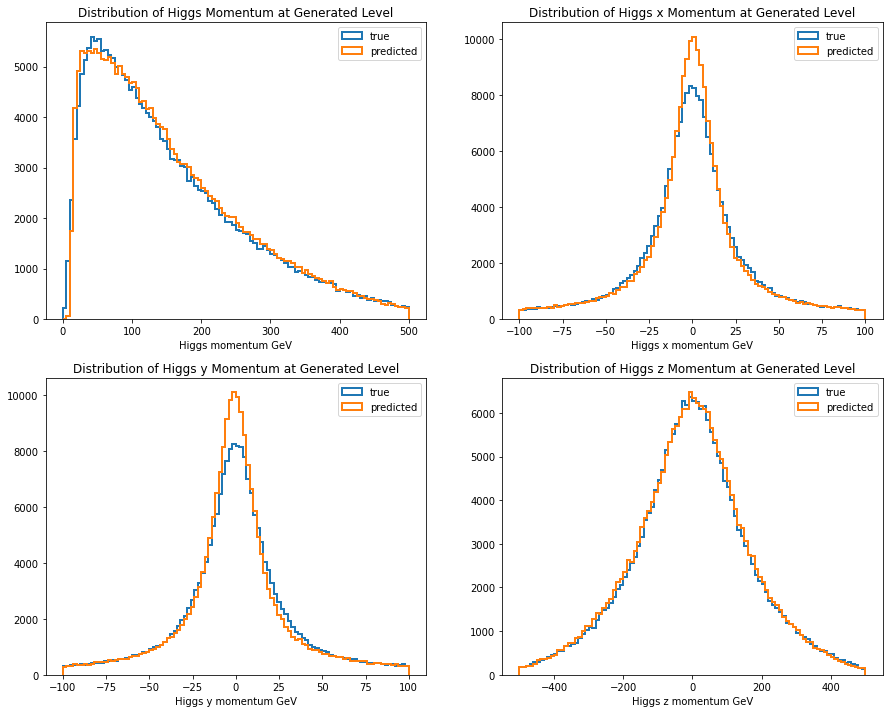

In [48]:
nbins=100

fig = plt.figure(figsize=(15,12))
plt.subplot(221)

plt.hist(data_true['gen_p'],bins=nbins, histtype=u'step', lw=2, label='true',range=(0,500))
plt.hist(data_pred['gen_p'],bins=nbins, histtype=u'step', lw=2, label='predicted',range=(0,500))
#plt.hist(X_test['reco_vis_p_1'],bins=nbins, histtype=u'step', lw=2, label='true(reco_vis+gen_nu)',range=(0,300))
plt.xlabel('Higgs momentum GeV')
plt.title('Distribution of Higgs Momentum at Generated Level')
plt.legend()

plt.subplot(222)
plt.hist(data_true['gen_px'],bins=nbins, histtype=u'step', lw=2, label='true',range=(-100,100))
plt.hist(data_pred['gen_px'],bins=nbins, histtype=u'step', lw=2, label='predicted',range=(-100,100))
#plt.hist(X_test['reco_vis_p_1'],bins=nbins, histtype=u'step', lw=2, label='true(reco_vis+gen_nu)',range=(0,300))
plt.xlabel('Higgs x momentum GeV')
plt.title('Distribution of Higgs x Momentum at Generated Level')
plt.legend()

plt.subplot(223)
plt.hist(data_true['gen_py'],bins=nbins, histtype=u'step', lw=2, label='true',range=(-100,100))
plt.hist(data_pred['gen_py'],bins=nbins, histtype=u'step', lw=2, label='predicted',range=(-100,100))
#plt.hist(X_test['reco_vis_p_1'],bins=nbins, histtype=u'step', lw=2, label='true(reco_vis+gen_nu)',range=(0,300))
plt.xlabel('Higgs y momentum GeV')
plt.title('Distribution of Higgs y Momentum at Generated Level')
plt.legend()

plt.subplot(224)
plt.hist(data_true['gen_pz'],bins=nbins, histtype=u'step', lw=2, label='true',range=(-500,500))
plt.hist(data_pred['gen_pz'],bins=nbins, histtype=u'step', lw=2, label='predicted',range=(-500,500))
#plt.hist(X_test['reco_vis_p_1'],bins=nbins, histtype=u'step', lw=2, label='true(reco_vis+gen_nu)',range=(0,300))
plt.xlabel('Higgs z momentum GeV')
plt.title('Distribution of Higgs z Momentum at Generated Level')
plt.legend()

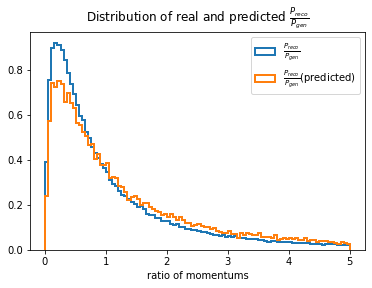

In [49]:

Tau_p_1 = X_test['reco_p']

Tau_gen_p_1 = y_test['gen_p']

#y_test_new = pd.DataFrame(scaler_y.inverse_transform(data_pred),columns=y_test.columns)
y_test_new = pd.DataFrame(data_pred,columns=y_test.columns)
Tau_p_1_r = Tau_p_1/Tau_gen_p_1
#Tau_vis_p_1 = X_test["gen_vis_p_1"]/Tau_gen_p_1
Tau_p_1_new = y_test_new["gen_p"]/Tau_gen_p_1

plt.hist(Tau_p_1_r,bins=nbins, histtype=u'step', lw=2, label='$\\frac{P_{reco}}{P_{gen}}$', density=True,range=(0.01,5))
#plt.hist(Tau_vis_p_1,bins=nbins, histtype=u'step', lw=2, label='$\\frac{P_{vis}}{P_{gen}}(generated)$', density=True,range=(0.01,3))
plt.hist(Tau_p_1_new,bins=nbins, histtype=u'step', lw=2, label='$\\frac{P_{reco}}{P_{gen}}$(predicted)', density=True,range=(0.01,5))
plt.xlabel('ratio of momentums')
plt.title('Distribution of real and predicted $\\frac{P_{reco}}{P_{gen}}$')
plt.legend()

# print(Tau_p_1_r.mean(), Tau_p_1_r.std())
# print(Tau_p_1_new.mean(), Tau_p_1_new.std())
# print(X_test["reco_p"][:10])    

In [50]:
# plt.hist(X_test["reco_vis_p_1"]/X_test['gen_vis_p_1'],bins = 100,range=(0,10))
# plt.xlabel('$\\frac{P_{reco_vis}}{P_{gen_vis}}$')
# plt.title('Distribution of real and predicted $\\frac{P_{recovis}}{P_{genvis}}$')

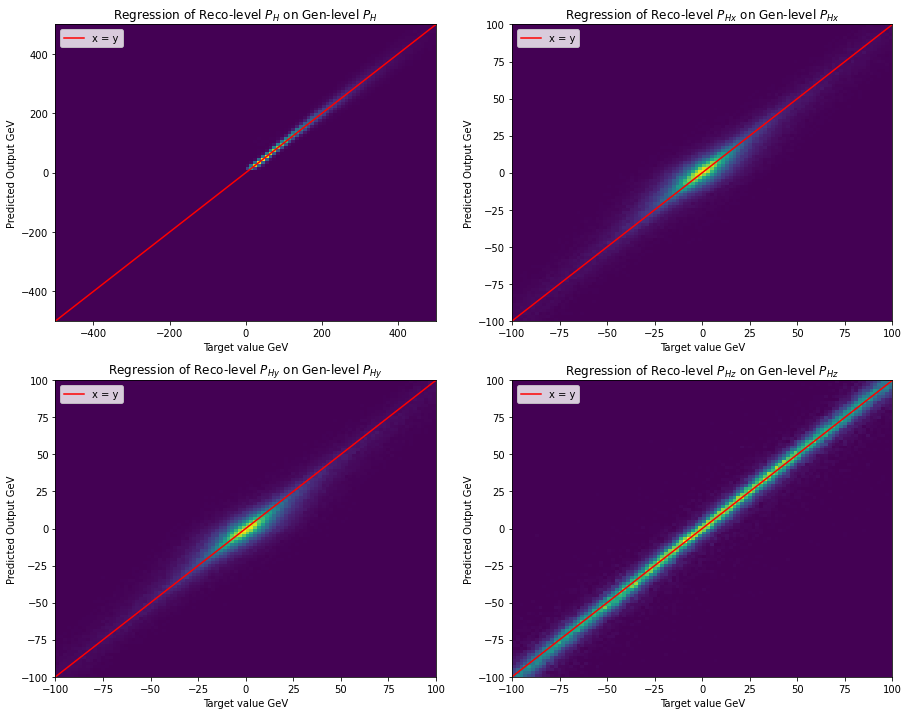

In [51]:
x = np.linspace(-500,640,100)
y = x

fig = plt.figure(figsize=(15,12))
plt.subplot(221)
#plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
plt.hist2d(data_true['gen_p'],data_pred['gen_p'],bins = 100,range = [[-500,500], [-500, 500]])
plt.plot(x,y,'r-',label = 'x = y')
plt.xlabel('Target value GeV')
plt.ylabel('Predicted Output GeV')
plt.title('Regression of Reco-level $P_H$ on Gen-level $P_H$')
plt.legend()

plt.subplot(222)
#plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
plt.hist2d(data_true['gen_px'],data_pred['gen_px'],bins = 100,range = [[-100,100], [-100, 100]])
plt.plot(x,y,'r-',label = 'x = y')
plt.xlabel('Target value GeV')
plt.ylabel('Predicted Output GeV')
plt.title('Regression of Reco-level $P_{Hx}$ on Gen-level $P_{Hx}$')
plt.legend()

plt.subplot(223)
#plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
plt.hist2d(data_true['gen_py'],data_pred['gen_py'],bins = 100,range = [[-100,100], [-100, 100]])
plt.plot(x,y,'r-',label = 'x = y')
plt.xlabel('Target value GeV')
plt.ylabel('Predicted Output GeV')
plt.title('Regression of Reco-level $P_{Hy}$ on Gen-level $P_{Hy}$')
plt.legend()

plt.subplot(224)
#plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
plt.hist2d(data_true['gen_pz'],data_pred['gen_pz'],bins = 100,range = [[-100,100], [-100, 100]])
plt.plot(x,y,'r-',label = 'x = y')
plt.xlabel('Target value GeV')
plt.ylabel('Predicted Output GeV')
plt.title('Regression of Reco-level $P_{Hz}$ on Gen-level $P_{Hz}$')
plt.legend()

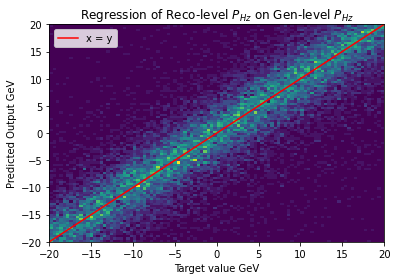

In [67]:
plt.hist2d(data_true['gen_pz'],data_pred['gen_pz'],bins = 100,range = [[-20,20], [-20, 20]])
plt.plot(x,y,'r-',label = 'x = y')
plt.xlabel('Target value GeV')
plt.ylabel('Predicted Output GeV')
plt.title('Regression of Reco-level $P_{Hz}$ on Gen-level $P_{Hz}$')
plt.legend()

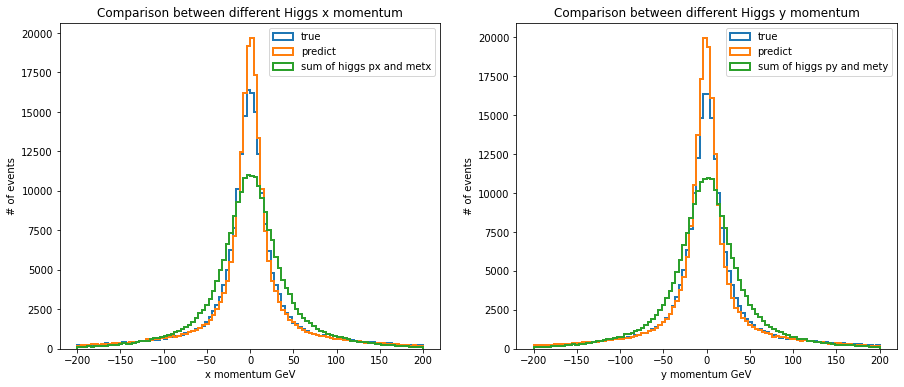

In [52]:
a = X_test_o['reco_px']+X_test_o['metx']
b = X_test_o['reco_py']+X_test_o['mety']
#c = X_test['reco_pz']

fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.hist(data_true['gen_px'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'true')
plt.hist(data_pred['gen_px'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'predict')
plt.hist(a,histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'sum of higgs px and metx')
#plt.hist(X_test_o['px'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'svfit px')
plt.xlabel('x momentum GeV')
plt.ylabel('# of events')
plt.title('Comparison between different Higgs x momentum')
plt.legend()

plt.subplot(122)
plt.hist(data_true['gen_py'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'true')
plt.hist(data_pred['gen_py'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'predict')
plt.hist(b,histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'sum of higgs py and mety')
#plt.hist(X_test_o['py'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'svfit py')
plt.xlabel('y momentum GeV')
plt.ylabel('# of events')
plt.title('Comparison between different Higgs y momentum')
plt.legend()

# plt.subplot(223)
# plt.hist(data_pred['gen_pz'],histtype=u'step', lw=2,bins = nbins,range = (-2000,2000),label = 'predict')
# plt.hist(c,histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'sum of higgs pz and met')
# plt.hist(data_true['gen_pz'],histtype=u'step', lw=2,bins = nbins,range = (-2000,2000),label = 'true')
# plt.xlabel('z momentum GeV')
# plt.ylabel('# of events')
# plt.title('Comparison between different Higgs z momentum')
# plt.legend()

In [53]:
a = X_test_o['reco_px']+X_test_o['metx']
da = {'simple_x':a,'simple_y':b}
df_a = pd.DataFrame(da).reset_index()

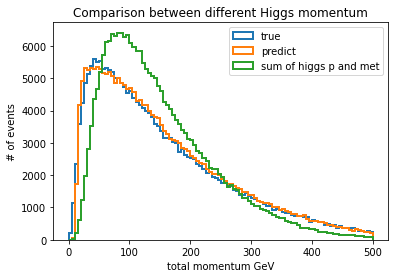

In [54]:
d = X_test['reco_p']+X_test['met']

plt.hist(data_true['gen_p'],histtype=u'step', lw=2,bins = nbins,range = (0,500),label = 'true')
plt.hist(data_pred['gen_p'],histtype=u'step', lw=2,bins = nbins,range = (0,500),label = 'predict')
plt.hist(d,histtype=u'step', lw=2,bins = nbins,range = (0,500),label = 'sum of higgs p and met')
plt.xlabel('total momentum GeV')
plt.ylabel('# of events')
plt.title('Comparison between different Higgs momentum')
plt.legend()

In [55]:
dft_x = data_true['gen_px'].reset_index()
X_test_x =  X_test_o['px'].reset_index()

dft_y = data_true['gen_py'].reset_index()
X_test_y =  X_test_o['py'].reset_index()

dft_z = data_true['gen_pz'].reset_index()
X_test_z =  X_test_o['pz'].reset_index()

In [56]:
d = {'svfit_x': X_test_x['px'],'pred_x': data_pred['gen_px'], 'true_x': dft_x['gen_px'],
    'svfit_y': X_test_y['py'],'pred_y': data_pred['gen_py'], 'true_y': dft_y['gen_py'],
    'svfit_z': X_test_z['pz'],'pred_z': data_pred['gen_pz'], 'true_z': dft_z['gen_pz']}
df_test = pd.DataFrame(d)

In [57]:
d_t = df_test[(dft_z['gen_pz']<50)&(dft_z['gen_pz']>-50)]

In [58]:
d_t

,svfit_x,pred_x,true_x,svfit_y,pred_y,true_y,svfit_z,pred_z,true_z
0,0.127397,1.248451,1.335287,7.298576,14.547543,35.723076,-13.132814,-47.244587,-49.668919
1,-6.800117,-3.313008,-13.417062,11.317295,11.929398,18.888483,-6.143973,-7.913685,-8.627851
4,18.584692,20.282078,30.843801,-1.625950,5.692255,-13.844398,-23.391552,-22.427820,-19.475801
5,49.795349,50.201141,57.062242,-405.550568,-385.159180,-420.486811,61.519524,47.388248,15.420105
8,-9.716516,-20.771694,-20.723756,-42.086857,-34.808285,-34.472998,-10.911315,-2.619212,-2.215523
...,...,...,...,...,...,...,...,...,...
232687,-68.964218,-58.356373,-67.991881,15.921644,34.746708,21.495386,40.920563,24.330992,36.955906
232691,72.116150,52.072666,79.630716,-43.331757,-51.561623,-40.653906,-4.208408,-13.315034,-4.151449
232694,2.784150,2.464540,3.109613,2.784150,-4.695272,-2.566600,7.930960,30.187857,28.248225
232698,4.819004,-0.500786,-0.529283,55.081463,58.707928,60.497010,8.324916,9.219567,12.205939


Text(0.5, 1.0, 'difference of predicted Pz and true Pz')

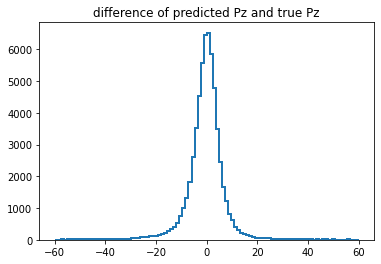

In [59]:
plt.hist(d_t['pred_z']-d_t['true_z'],histtype=u'step', lw=2,bins = nbins,range = (-60,60),label = 'true')
plt.title('difference of predicted Pz and true Pz')

In [60]:
# x = np.linspace(-500,640,100)
# y = x

# fig = plt.figure(figsize=(15,6))
# plt.subplot(121)
# #plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
# plt.hist2d(X_test_o['px'],data_pred['gen_px'],bins = 100,range = [[-100,100], [-100, 100]])
# plt.plot(x,y,'r-',label = 'x = y')
# plt.xlabel('SVfit value GeV')
# plt.ylabel('Predicted Output GeV')
# plt.title('Regression of Reco-level $P_{Hx}$ on Gen-level $P_{Hx}$')
# plt.legend()

# plt.subplot(122)
# #plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
# plt.hist2d(X_test_o['py'],data_pred['gen_py'],bins = 100,range = [[-100,100], [-100, 100]])
# plt.plot(x,y,'r-',label = 'x = y')
# plt.xlabel('SVfit value GeV')
# plt.ylabel('Predicted Output GeV')
# plt.title('Regression of Reco-level $P_{Hy}$ on Gen-level $P_{Hy}$')
# plt.legend()

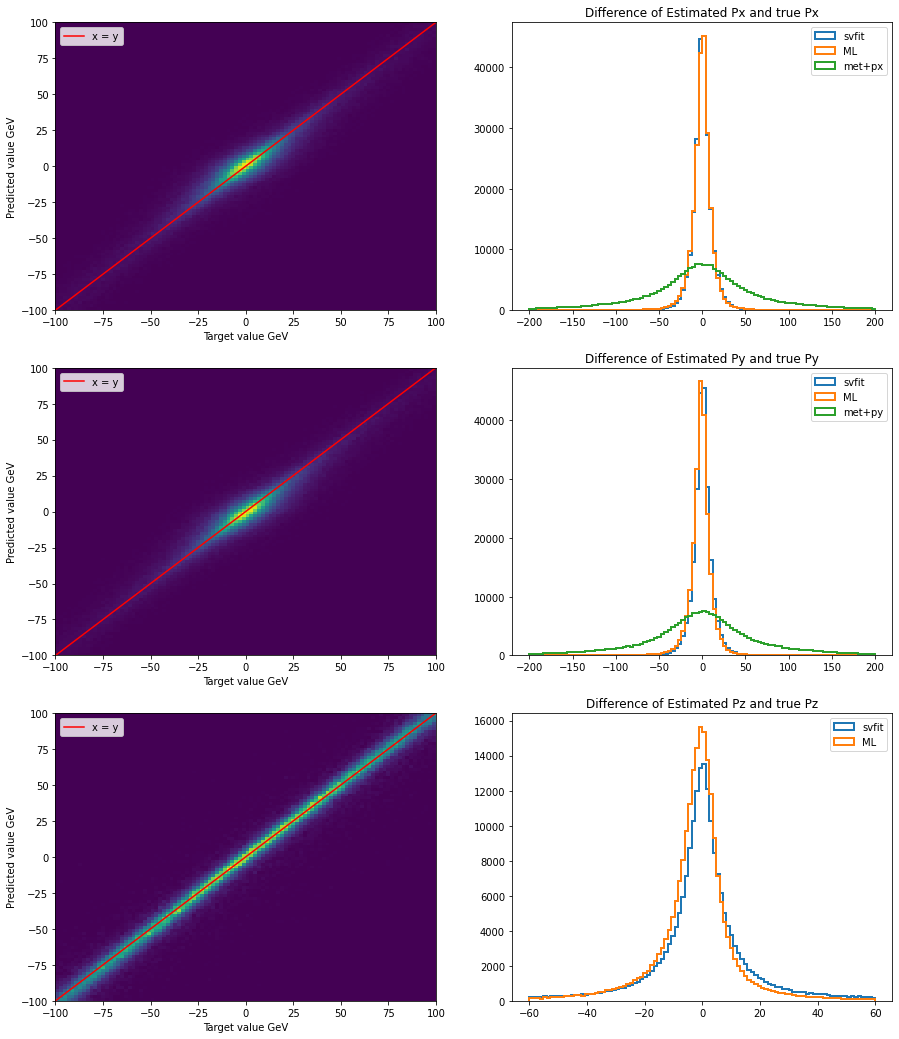

In [61]:
x = np.linspace(-500,640,100)
y = x

fig = plt.figure(figsize=(15,18))
plt.subplot(321)
#plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
#plt.hist2d(X_test_o['px'],data_true['gen_px'],bins = 100,range = [[-100,100], [-100, 100]])
plt.hist2d(data_true['gen_px'],data_pred['gen_px'],bins = 100,range = [[-100,100], [-100, 100]])
plt.plot(x,y,'r-',label = 'x = y')
#plt.xlabel('SVfit value GeV')
plt.ylabel('Predicted value GeV')
plt.xlabel('Target value GeV')
#plt.title('Regression of Reco-level $P_{Hx}$ on Gen-level $P_{Hx}$')
plt.legend()

plt.subplot(322)
plt.hist(df_test['svfit_x']-df_test['true_x'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'svfit')
plt.hist(df_test['pred_x']-df_test['true_x'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'ML')
plt.hist(df_a['simple_x']-df_test['true_x'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'met+px')
plt.title('Difference of Estimated Px and true Px')
plt.legend()

plt.subplot(323)
#plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
#plt.hist2d(X_test_o['py'],data_true['gen_py'],bins = 100,range = [[-100,100], [-100, 100]])
plt.hist2d(data_true['gen_py'],data_pred['gen_py'],bins = 100,range = [[-100,100], [-100, 100]])
plt.plot(x,y,'r-',label = 'x = y')
#plt.xlabel('SVfit value GeV')
plt.ylabel('Predicted value GeV')
plt.xlabel('Target value GeV')
#plt.title('Regression of Reco-level $P_{Hy}$ on Gen-level $P_{Hy}$')
plt.legend()

plt.subplot(324)
plt.hist(df_test['svfit_y']-df_test['true_y'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'svfit')
plt.hist(df_test['pred_y']-df_test['true_y'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'ML')
plt.hist(df_a['simple_y']-df_test['true_y'],histtype=u'step', lw=2,bins = nbins,range = (-200,200),label = 'met+py')
plt.title('Difference of Estimated Py and true Py')
plt.legend()

plt.subplot(325)
#plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
#plt.hist2d(X_test_o['pz'],data_true['gen_pz'],bins = 100,range = [[-100,100], [-100, 100]])
plt.hist2d(data_true['gen_pz'],data_pred['gen_pz'],bins = 100,range = [[-100,100], [-100, 100]])
plt.plot(x,y,'r-',label = 'x = y')
#plt.xlabel('SVfit value GeV')
plt.ylabel('Predicted value GeV')
plt.xlabel('Target value GeV')
#plt.title('Regression of Reco-level $P_{Hz}$ on Gen-level $P_{Hz}$')
plt.legend()

plt.subplot(326)
plt.hist(df_test['svfit_z']-df_test['true_z'],histtype=u'step', lw=2,bins = nbins,range = (-60,60),label = 'svfit')
plt.hist(df_test['pred_z']-df_test['true_z'],histtype=u'step', lw=2,bins = nbins,range = (-60,60),label = 'ML')
plt.title('Difference of Estimated Pz and true Pz')
plt.legend()

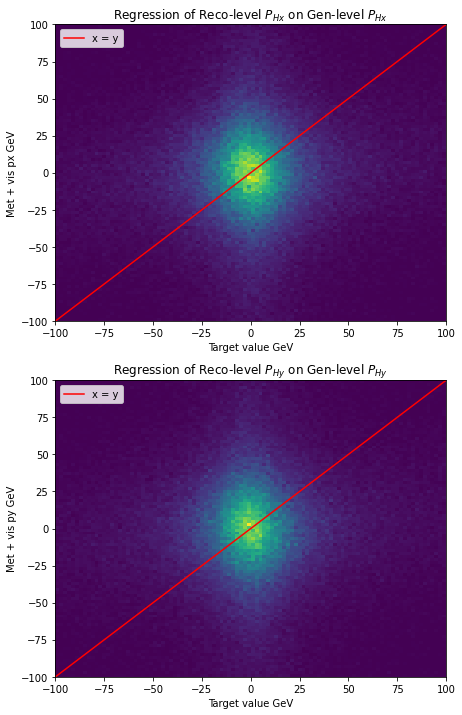

In [62]:
x = np.linspace(-500,640,100)
y = x

fig = plt.figure(figsize=(7,12))
# plt.subplot(221)
# #plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
# plt.hist2d(data_true['gen_p'],data_pred['gen_p'],bins = 100,range = [[-500,500], [-500, 500]])
# plt.plot(x,y,'r-',label = 'x = y')
# plt.xlabel('Target value GeV')
# plt.ylabel('Predicted Output GeV')
# plt.title('Regression of Reco-level $P_H$ on Gen-level $P_H$')
# plt.legend()

plt.subplot(211)
#plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
plt.hist2d(df_test['true_x'],df_a['simple_x'],bins = 100,range = [[-100,100], [-100, 100]])
plt.plot(x,y,'r-',label = 'x = y')
plt.xlabel('Target value GeV')
plt.ylabel('Met + vis px GeV')
plt.title('Regression of Reco-level $P_{Hx}$ on Gen-level $P_{Hx}$')
plt.legend()

plt.subplot(212)
#plt.plot(y_eval,final_pred,'o',label='prediction')#,c='#88c999')
plt.hist2d(df_test['true_y'],df_a['simple_y'],bins = 100,range = [[-100,100], [-100, 100]])
plt.plot(x,y,'r-',label = 'x = y')
plt.xlabel('Target value GeV')
plt.ylabel('Met + vis py GeV')
plt.title('Regression of Reco-level $P_{Hy}$ on Gen-level $P_{Hy}$')
plt.legend()

In [63]:
data_true['gen_px']

entry
789810       1.335287
117763     -13.417062
67895     -127.512528
1291485     36.956200
87382       30.843801
              ...    
699654      45.578891
384588      -4.580487
761075     -56.317727
1257542   -100.681360
1233764    -12.714592
Name: gen_px, Length: 232712, dtype: float64

In [64]:
newx = X_test_o['reco_px']+X_test_o['metx']
newy = X_test_o['reco_py']+X_test_o['mety']

In [65]:
df_a['simple_x']

0          2.239524
1          5.521969
2        -38.949962
3         33.086713
4         18.961917
            ...    
232707    -2.856487
232708    -8.854161
232709     9.856700
232710   -40.006211
232711   -25.239168
Name: simple_x, Length: 232712, dtype: float64

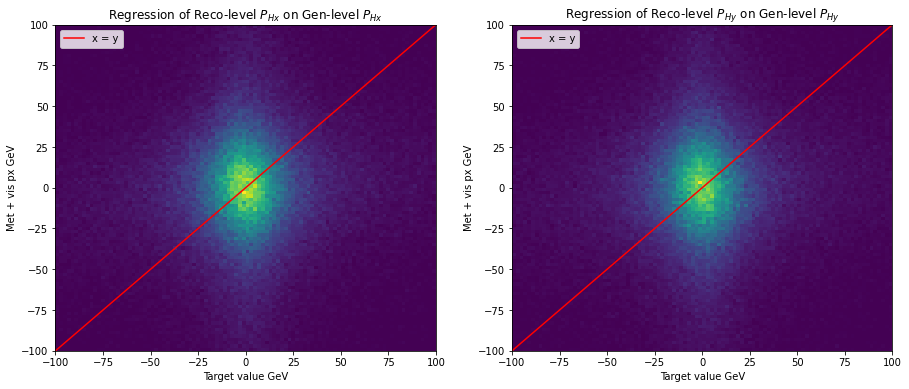

In [66]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.hist2d(data_true['gen_px'],newx,bins = 100,range = [[-100,100], [-100, 100]])
plt.plot(x,y,'r-',label = 'x = y')
plt.xlabel('Target value GeV')
plt.ylabel('Met + vis px GeV')
plt.title('Regression of Reco-level $P_{Hx}$ on Gen-level $P_{Hx}$')
plt.legend()
plt.subplot(122)
plt.hist2d(data_true['gen_py'],newy,bins = 100,range = [[-100,100], [-100, 100]])
plt.plot(x,y,'r-',label = 'x = y')
plt.xlabel('Target value GeV')
plt.ylabel('Met + vis px GeV')
plt.title('Regression of Reco-level $P_{Hy}$ on Gen-level $P_{Hy}$')
plt.legend()